In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel("ASIANPAINT_Dataset (1).xlsx")
df.head()


,Date,Expiry,t,strike_price,underlying_value,sigma,r,close
0,2020-01-01,2020-01-30,29,1980,1793.2,0.008151,0.0494,3.8
1,2020-01-01,2020-01-30,29,1440,1793.2,0.008151,0.0494,398.5
2,2020-01-01,2020-01-30,29,2020,1793.2,0.008151,0.0494,1.2
3,2020-01-01,2020-01-30,29,1920,1793.2,0.008151,0.0494,6.5
4,2020-01-01,2020-01-30,29,1940,1793.2,0.008151,0.0494,5.0


In [ ]:
df.tail()

,Date,Expiry,t,strike_price,underlying_value,sigma,r,close
35586,2020-12-31,2021-02-25,56,2620,2764.5,0.015889,0.0308,40.15
35587,2020-12-31,2021-02-25,56,2640,2764.5,0.015889,0.0308,37.40
35588,2020-12-31,2021-02-25,56,2660,2764.5,0.015889,0.0308,34.80
35589,2020-12-31,2021-02-25,56,2680,2764.5,0.015889,0.0308,32.40
35590,2020-12-31,2021-02-25,56,2700,2764.5,0.015889,0.0308,30.10


In [ ]:
df.shape

(35591, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35591 entries, 0 to 35590
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              35591 non-null  datetime64[ns]
 1   Expiry            35591 non-null  datetime64[ns]
 2   t                 35591 non-null  int64         
 3   strike_price      35591 non-null  int64         
 4   underlying_value  35591 non-null  float64       
 5   sigma             35591 non-null  float64       
 6   r                 35591 non-null  float64       
 7   close             35591 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(2)
memory usage: 2.2 MB


In [ ]:
df.describe()

,Date,Expiry,t,strike_price,underlying_value,sigma,r,close
count,35591,35591,35591.000000,35591.000000,35591.000000,35591.000000,35591.000000,35591.000000
mean,2020-07-30 12:35:32.629035520,2020-09-12 12:00:15.779270144,43.975499,1837.912394,1970.402544,0.019941,0.035962,207.026833
min,2020-01-01 00:00:00,2020-01-30 00:00:00,0.000000,1300.000000,1498.450000,0.007787,0.029300,0.050000
25%,2020-05-04 00:00:00,2020-06-25 00:00:00,21.000000,1560.000000,1724.250000,0.015889,0.031500,57.900000
50%,2020-08-19 00:00:00,2020-09-24 00:00:00,43.000000,1800.000000,1891.300000,0.017918,0.032500,166.150000
75%,2020-11-03 00:00:00,2020-12-31 00:00:00,66.000000,2040.000000,2166.550000,0.019862,0.035200,324.750000
max,2020-12-31 00:00:00,2021-02-25 00:00:00,97.000000,3140.000000,2764.500000,0.052411,0.052800,1360.000000
std,NaN,NaN,26.347567,353.981841,309.650698,0.008570,0.007311,175.737167


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Date', 'Expiry', 't', 'strike_price', 'underlying_value', 'sigma', 'r',
       'close'],
      dtype='object')

<Axes: >

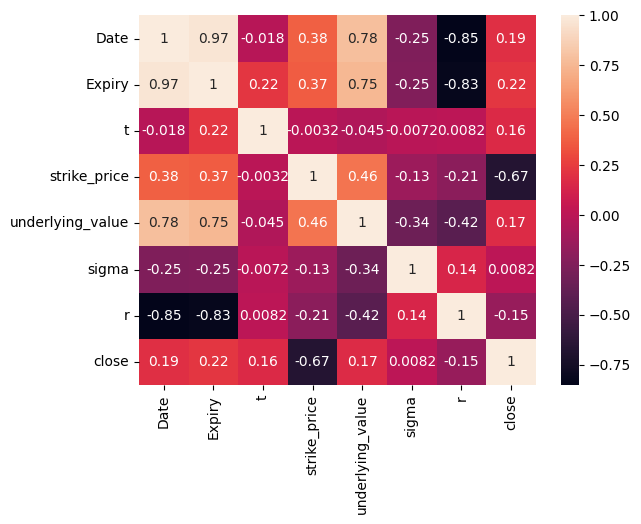

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
features = ['underlying_value', 'strike_price', 't', 'sigma', 'r']
target = 'close'

X = df[features]
y = df[target]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),Dense(32, activation='relu'),Dense(1)])
model.compile(optimizer='adam',loss='mse')
model.fit(X_train_scaled,y_train,epochs=50,batch_size=32,validation_split=0.2,verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 48561.0703 - val_loss: 4942.8848
Epoch 2/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4796.8359 - val_loss: 4444.2769
Epoch 3/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4215.7397 - val_loss: 4228.4834
Epoch 4/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4152.5801 - val_loss: 4047.3149
Epoch 5/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3925.6770 - val_loss: 3911.0371
Epoch 6/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3773.8962 - val_loss: 3697.5864
Epoch 7/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3613.3896 - val_loss: 3576.6624
Epoch 8/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3508.9121 - val_loss: 3473.1157
Epoch 9/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3415.3977 - val_loss: 3408.3140
Epoch 10/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3493.8025 - val_loss: 3322.1316
Epoch 11/50
712/712 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3290.0928 - val_l

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R² :", r2_score(y_test, y_pred_lr))
print("\nMLP:")
print("MAE:", mean_absolute_error(y_test, y_pred_mlp))
print("R² :", r2_score(y_test, y_pred_mlp))

Linear Regression:
MAE: 62.740924109921075
R² : 0.7977776735265175

MLP:
MAE: 29.647914908113215
R² : 0.9337394535823405


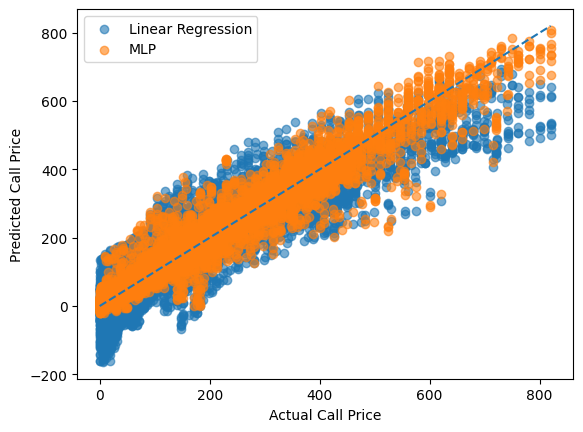

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6)
plt.scatter(y_test, y_pred_mlp, label="MLP", alpha=0.6)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],linestyle='--')
plt.xlabel("Actual Call Price")
plt.ylabel("Predicted Call Price")
plt.legend()
plt.show()


In [ ]:
def predict_call_price(S, K, T, sigma, r):
    input_df = pd.DataFrame([[S, K, T, sigma, r]],columns=['underlying_value', 'strike_price', 't', 'sigma', 'r'])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    return float(prediction[0][0])


In [ ]:
predict_call_price(S=3000,K=3100,T=0.25,sigma=0.2,r=0.05)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1045.834228515625

In [ ]:
predict_call_price(1980,1793.2,29,0.008151,0.0494)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


127.51763153076172

In [ ]:
predict_call_price(1440,1793.2,29,0.008151,0.0494)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


54.48696517944336

In [ ]:
predict_call_price(1790,1793.2,29,0.008151,0.0494)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


79.41805267333984